# EDA on Playstore App Review
### By Rahul Inchal

## Business Context
The playstore apps has enormous potential to drive app-making business success. Actionable insights can be drawn for developers to work on and capture the android market. Each app (row) has value for category, ratimg, size, and more.
Another dataset contain customer reviews of the android apps. Explotre and analyse the data to discover key factors responsible for app engagement and success.

## Problem Statement
*  The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. 

*  Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

*  Explore and analyze the data to discover key factors responsible for app engagement and success. 

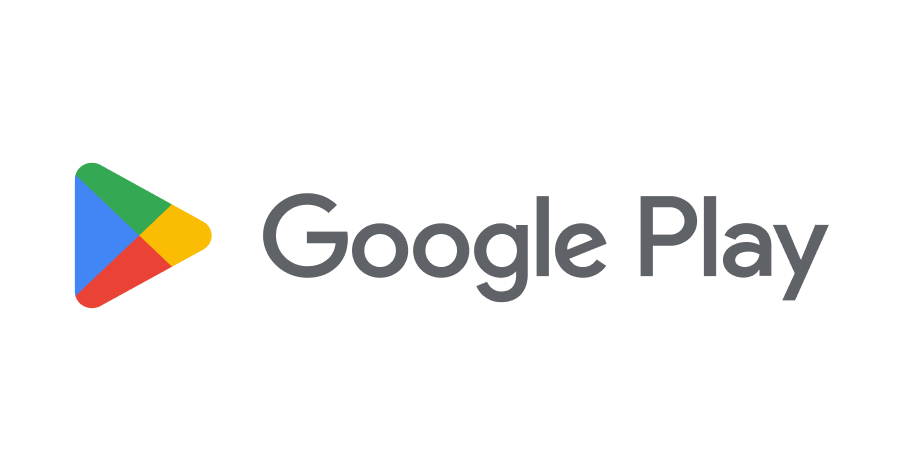

### Importing Important packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# importing the datetime library
from datetime import datetime

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Exploring Play Store Data

### Loading the dataset

In [2]:
ps = pd.read_csv("https://raw.githubusercontent.com/rahulinchal/EDA-on-Play-Store-App-Review/main/Play%20Store%20Data.csv")
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Data Description
* **App**: Contains the name of the app with a short description (optional).
* **Category** : It gives the category to the app.
* **Rating**: It contains the average rating the respective app received from its users.
* **Reviews**: It contains the number of users that have dropped a review for the respective app.
* **Size**: It contains the the disk space required to install the respective app.
* **Installs**: It gives the rounded figure of number of times the respective app was downloaded.
* **Type**: It states whether an app is free to use or paid.
* **Price**: It gives the price payable to install the app. For free type apps, the price is zero.
* **Content rating**: It states whether or not an app is suitable for all age groups or not.
* **Genres**: It gives the genre(s) to which the respective app belongs.
* **Last updated**: It gives the day in which the latest update was released.
* **Current Ver**: It gives the current version of the respective app.
* **Android Ver**: It gives the android version of the respective app.

In [3]:
# Getting the information
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# Getting the shape
ps.shape

(10841, 13)

In [5]:
# Finding the duplicated value
dup = ps.duplicated().value_counts()
dup

False    10358
True       483
dtype: int64

Text(0.5, 1.0, 'Duplicated Value')

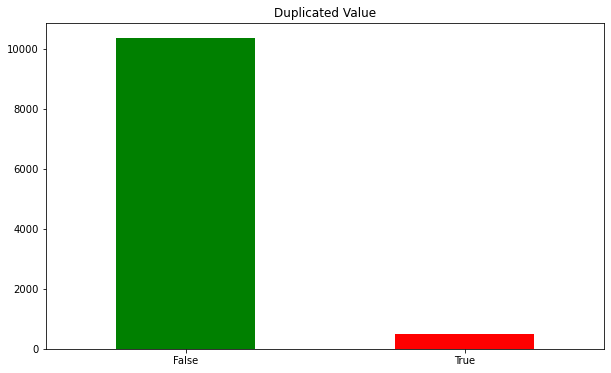

In [6]:
# Visualizing through bar graph
plt.figure(figsize = (10,6))
dup.plot(kind = 'bar', color = ['g','r'])
plt.xticks(rotation = 360)
plt.title("Duplicated Value")

In [7]:
# Droping the duplicated value
ps = ps.drop_duplicates()
ps.duplicated().value_counts()

False    10358
dtype: int64

### Finding the null values

In [8]:
ps.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Text(0.5, 1.0, 'Places of missing values in column')

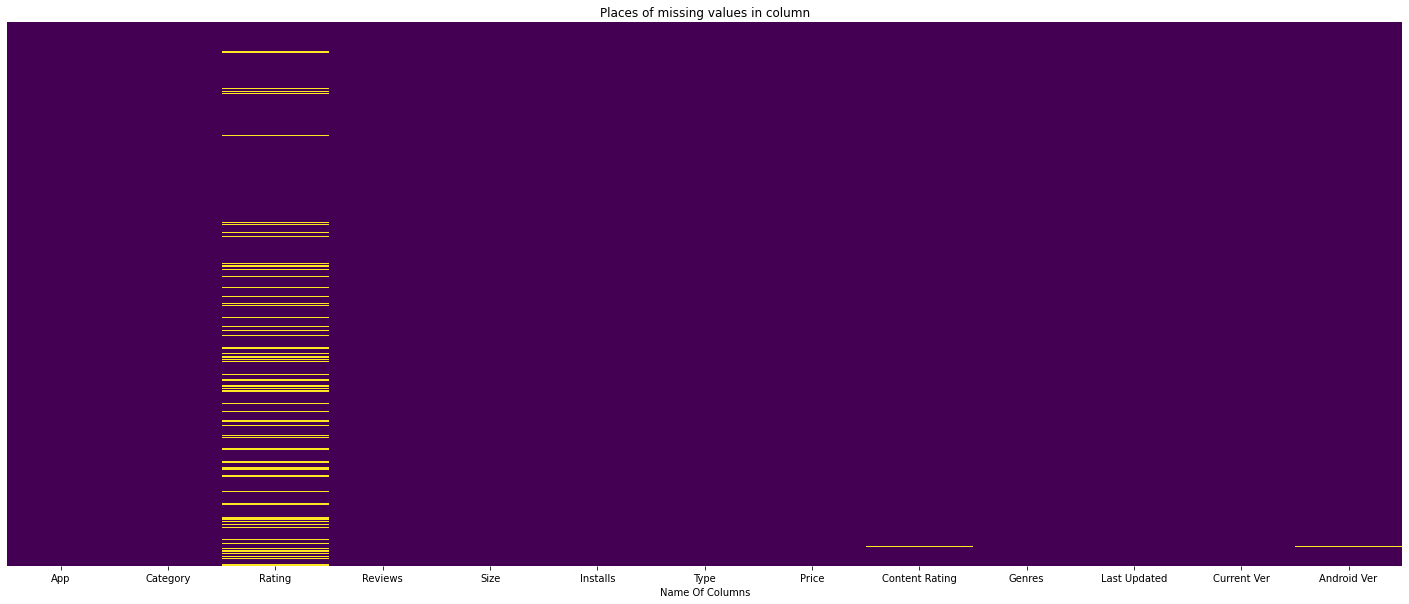

In [9]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(ps.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

In [10]:
# Finding the unique values
print(ps.apply(lambda col: col.unique()))

App               [Photo Editor & Candy Camera & Grid & ScrapBoo...
Category          [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO...
Rating            [4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, ...
Reviews           [159, 967, 87510, 215644, 167, 178, 36815, 137...
Size              [19M, 14M, 8.7M, 25M, 2.8M, 5.6M, 29M, 33M, 3....
Installs          [10,000+, 500,000+, 5,000,000+, 50,000,000+, 1...
Type                                           [Free, Paid, nan, 0]
Price             [0, $4.99, $3.99, $6.99, $1.49, $2.99, $7.99, ...
Content Rating    [Everyone, Teen, Everyone 10+, Mature 17+, Adu...
Genres            [Art & Design, Art & Design;Pretend Play, Art ...
Last Updated      [January 7, 2018, January 15, 2018, August 1, ...
Current Ver       [1.0.0, 2.0.0, 1.2.4, Varies with device, 1.1,...
Android Ver       [4.0.3 and up, 4.2 and up, 4.4 and up, 2.3 and...
dtype: object


In [11]:
ps['Type'].value_counts()

Free    9591
Paid     765
0          1
Name: Type, dtype: int64

In [12]:
ps['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [13]:
ps[ps['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


### Since the Nan value in Type belongs to price 0 which means it shoud be of Type Free

In [14]:
ps['Type'].replace(np.nan, 'Free', inplace = True)

In [15]:
# Hence the null value is being replaced
ps[ps['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Treating the null values in Rating column

In [16]:
# How many null values are there
ps['Rating'].isnull().sum()

1465

In [17]:
# Lets find the mean and median of it
mean_rating = ps['Rating'].mean()
median_rating = ps['Rating'].median()
round(mean_rating, 1), round(median_rating, 2)

(4.2, 4.3)

<AxesSubplot:xlabel='Rating'>

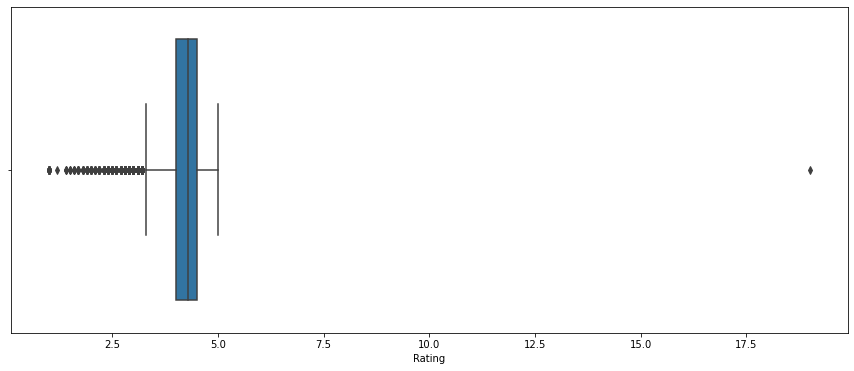

In [18]:
# lets chech the boxplot fot its outliers
plt.figure(figsize = (15,6))
sns.boxplot(ps['Rating'])

### Since there are a lot of outliers and we know that mean is affected by Outliers and not the median, hence we will replace the null values with median

In [19]:
ps['Rating'].replace(np.nan, ps['Rating'].median(), inplace = True)

In [20]:
# Checking for null values now
ps['Rating'].isnull().sum()

0

### Hence all the null values are replaced with median and now lets take care of outliers.

In [21]:
# Listng all the bottom 5 values 
sorted(ps['Rating'])[-5 :]

[5.0, 5.0, 5.0, 5.0, 19.0]

In [22]:
ps[ps['Rating'] == 19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### Since the rating cannot be 19 and also category cannot be 1.9 
### The entire row is misplaced because of one value of category column is missing so its better to drop the entire row. 

In [23]:
# Checking the shape before dropping
ps.shape

(10358, 13)

In [24]:
# Dropping the row number 10472
ps = ps.drop(10472)

In [25]:
# Checking the shape after dropping
ps.shape

(10357, 13)

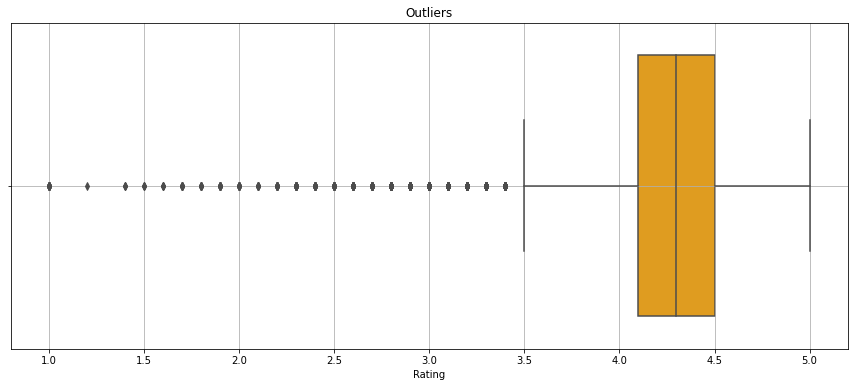

In [26]:
# lets chech the boxplot fot its outliers
plt.figure(figsize = (15,6))
sns.boxplot(ps['Rating'], color = 'orange')
plt.title("Outliers")
plt.grid()

## Observation
### Since according to the formula there may be outliers but the rating usually range between 1 to 5 and we can see that there are no values beyond the range. So not dropping the outliers.

### Checking for null values for Current Version and Android Version

In [27]:
ps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [28]:
ps['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [29]:
ps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Since there are only 8 null values in current version and 2 in android version hence either we can replace it or drop it. lets replace it with Varies with device.

In [30]:
ps['Current Ver'].replace(np.nan, 'Varies with device', inplace = True)
ps['Android Ver'].replace(np.nan, 'Varies with device', inplace = True)

In [31]:
ps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Let's change the date time format

In [32]:
# The datetime.strptime funtion applied to the values in the last updated column to convert datatype from string to datetime

ps['Last Updated'] = ps['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [33]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  object        
 4   Size            10357 non-null  object        
 5   Installs        10357 non-null  object        
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  object        
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.1+ MB


### The column Installs contain unnecessary characters like come (,) and plus (+) which has to be removed.

In [34]:
ps['Installs'].value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64

In [35]:
ps['Installs'] = ps['Installs'].str.replace(r"[+,]", '')
ps['Installs'].value_counts()

1000000       1488
10000000      1132
100000        1129
10000         1033
1000           890
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Name: Installs, dtype: int64

In [36]:
# Changing the datatype of Installs from object to int
ps['Installs'] = ps['Installs'].astype(int)

In [37]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  object        
 4   Size            10357 non-null  object        
 5   Installs        10357 non-null  int32         
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  object        
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(10)
memory usage: 1.1+ MB


### Defining a function to convert all the entries in KB to MB and then converting them to float datatype.
* We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.
* We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [38]:
def kb_to_mb(val):
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 2)
    else:
      return val
  except:
    return val

In [39]:
# The kb_to_mb funtion applied to the size column

ps['Size'] = ps['Size'].apply(lambda x: kb_to_mb(x))
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [40]:
ps['Size'].value_counts()

Varies with device    1526
11.0                   188
13.0                   186
12.0                   186
14.0                   182
                      ... 
0.48                     1
0.1                      1
0.56                     1
0.75                     1
0.66                     1
Name: Size, Length: 274, dtype: int64

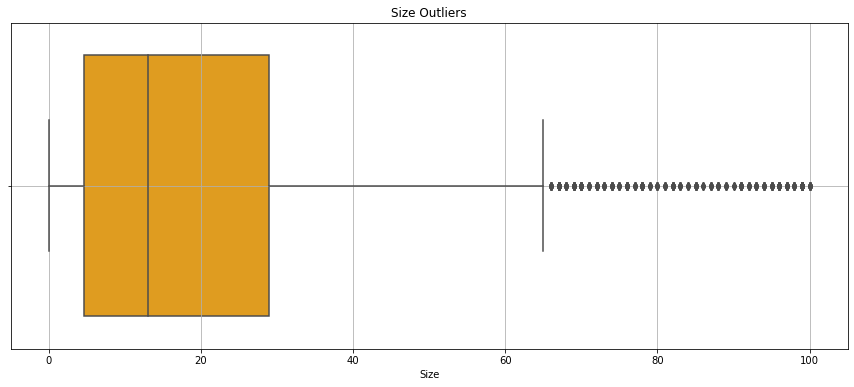

In [41]:
# Plottinfg the boxplot for the Size column except 'Varies with Device'
size_new = ps[ps['Size'] != 'Varies with device']['Size']

plt.figure(figsize = (15,6))
sns.boxplot(size_new, color = 'orange')
plt.title("Size Outliers")
plt.grid()

### There are outliers but we cannot remove them as they are the size of an app which can be as high as 100 mb and as low as 1mb also

In [42]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  object        
 4   Size            10357 non-null  object        
 5   Installs        10357 non-null  int32         
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  object        
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(10)
memory usage: 1.1+ MB


### The price column contain dollar sign which is a special character hence have to drop it because the machine wont understand the dollar sign as currency.
### Also Changing the type of Price column from object to float

In [43]:
ps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [44]:
ps['Price'] = ps['Price'].str.replace(r"[$]", '')
ps['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [45]:
ps['Price'] = ps['Price'].astype(float)

### Also changing the datatype of Reviews to float

In [46]:
ps['Reviews'] = ps['Reviews'].astype(float)
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  float64       
 4   Size            10357 non-null  object        
 5   Installs        10357 non-null  int32         
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(8)
memory usage: 1.1+ MB


### Describing the Play Store columns

In [47]:
ps.describe().style.background_gradient()

,Rating,Reviews,Installs,Price
count,10357.000000,10357.000000,10357.000000,10357.000000
mean,4.203737,405904.610602,14157759.440668,1.030800
std,0.485594,2696777.836748,80239553.869017,16.278625
min,1.000000,0.000000,0.000000,0.000000
25%,4.100000,32.000000,1000.000000,0.000000
50%,4.300000,1680.000000,100000.000000,0.000000
75%,4.500000,46416.000000,1000000.000000,0.000000
max,5.000000,78158306.000000,1000000000.000000,400.000000


### Correlation

<AxesSubplot:>

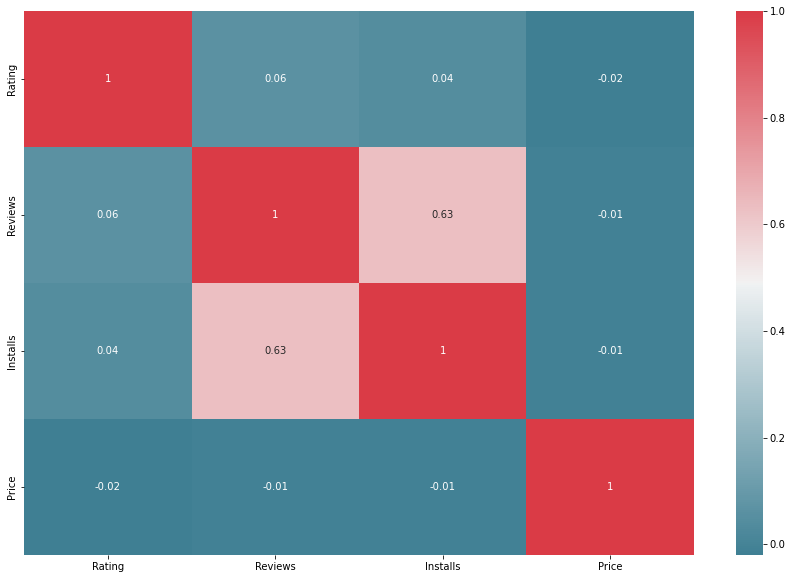

In [48]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(np.round(ps.corr(),2),annot=True, cmap=cmap)

## Exploratory Data Analysis

### Univariate Analysis

### 1. Which Category is most preffered by people?

In [95]:
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [50]:
ps['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

Text(0.5, 1.0, 'Most prefered category')

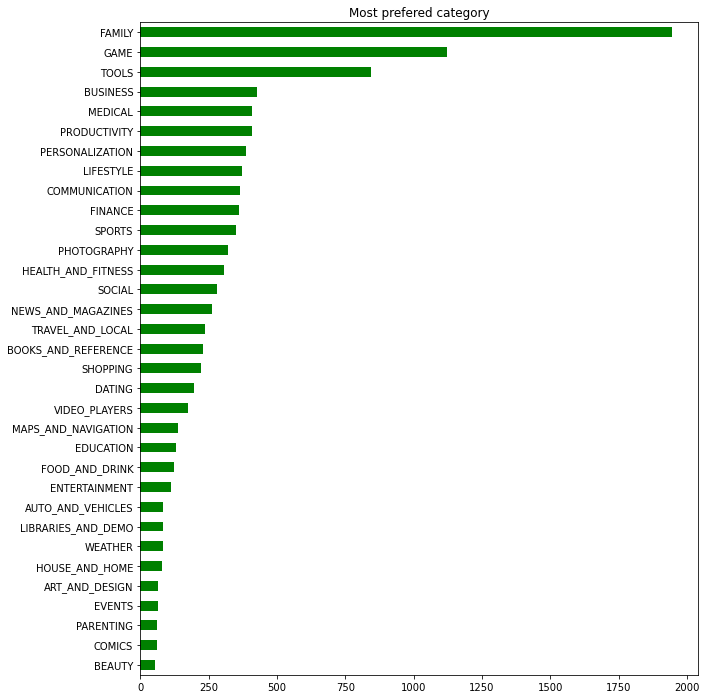

In [51]:
plt.figure(figsize = (10,12))
ps['Category'].value_counts().plot(kind = 'barh', color = 'g').invert_yaxis()
plt.title('Most prefered category')

### Observation
* Looks like people like Family category for downloading the app.
* Second best category is gaming.

### 2. What is the overall ratings for an app? 

In [52]:
ps['Rating'].value_counts()

4.3    2481
4.4    1032
4.5     977
4.2     888
4.6     768
4.1     657
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Total Rating ')

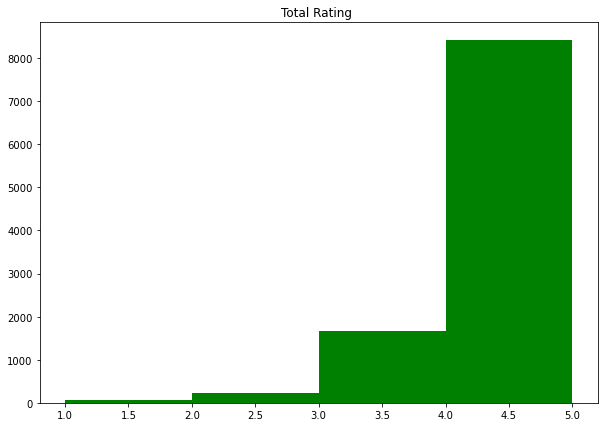

In [53]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(ps['Rating'], bins = [1, 2, 3, 4, 5], color = 'g')
plt.title("Total Rating ")

### Observation
* Almost more than 80% of the app in playstore lies between the range of 4 - 5

### 3. How many Installation happened?

In [54]:
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [55]:
ps['Installs'].value_counts().reset_index()

,index,Installs
0,1000000,1488
1,10000000,1132
2,100000,1129
3,10000,1033
4,1000,890
5,100,710
6,5000000,683
7,500000,517
8,50000,474
9,5000,469


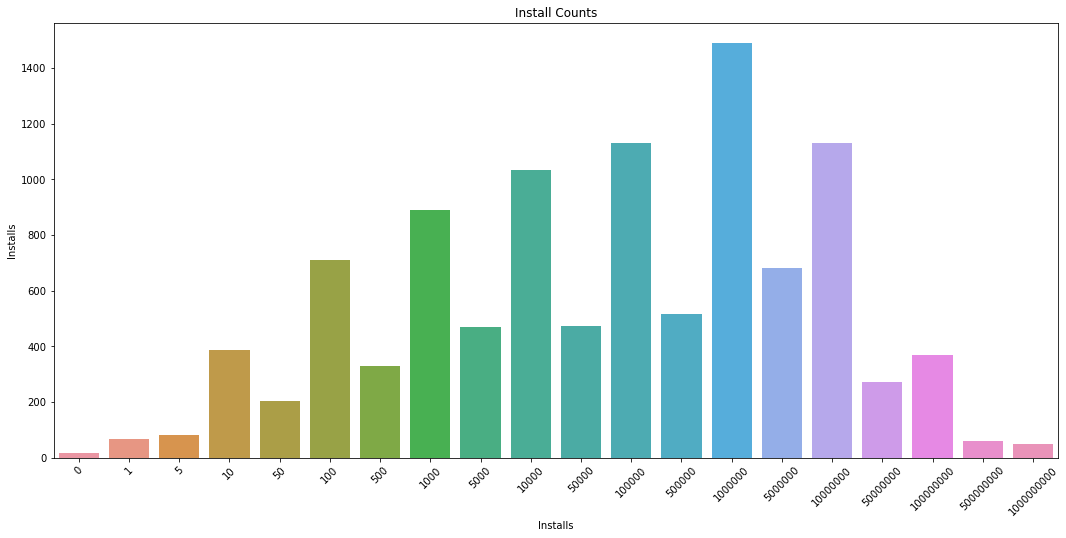

In [56]:
plt.figure(figsize = (18,8))
sns.barplot(data = ps, x = ps['Installs'].value_counts().keys(), y = ps['Installs'].value_counts())
plt.xticks(rotation = 45)
plt.title("Install Counts")
plt.xlabel("Installs");

### Observations
* There are 1488 apps with more than 10,00,000 downloads/ Installs.
* almost same amount of apps have 1,00,00 and 100,00,000 downloads/ Installs. 

### 4. Find the top free apps

In [57]:
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [58]:
# Filtering out free apps
free_apps = ps[ps['Type'] == 'Free']
free_apps['Type'].value_counts()

Free    9592
Name: Type, dtype: int64

In [59]:
# Sorting it with Installs
top_free_apps = free_apps[free_apps['Installs'] == free_apps['Installs'].max()]
top_free_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device


In [60]:
top_free_apps.shape

(49, 13)

In [61]:
top_free_apps['Category'].value_counts()

COMMUNICATION          14
SOCIAL                  7
GAME                    5
TRAVEL_AND_LOCAL        5
PHOTOGRAPHY             4
PRODUCTIVITY            3
VIDEO_PLAYERS           3
NEWS_AND_MAGAZINES      3
TOOLS                   2
BOOKS_AND_REFERENCE     1
ENTERTAINMENT           1
FAMILY                  1
Name: Category, dtype: int64

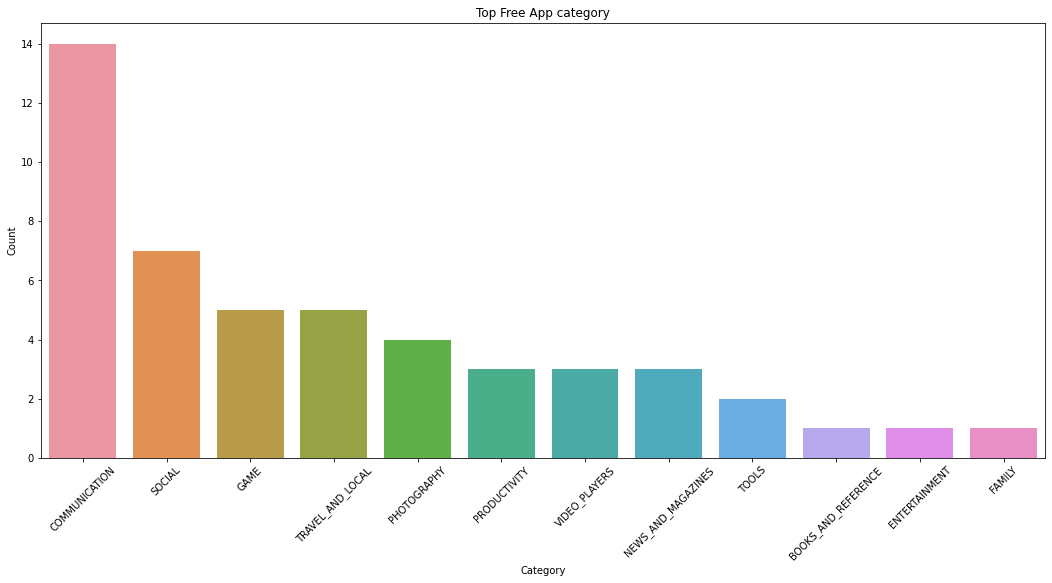

In [62]:
# Visualizing using barplot
plt.figure(figsize = (18,8))
sns.barplot(data = top_free_apps, x = top_free_apps['Category'].value_counts().keys(), 
            y = top_free_apps['Category'].value_counts())
plt.xticks(rotation = 45)
plt.title("Top Free App category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### Observation
* Communication is the category which has a lot of interest of people when it comes to free apps.
* Followed by the social category apps.

### 5. Find the top Paid apps

In [63]:
ps['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [64]:
# Filtering out paid apps
paid_apps = ps[ps['Type'] == 'Paid']
paid_apps['Type'].value_counts()

Paid    765
Name: Type, dtype: int64

In [65]:
paid_apps.sort_values(["Price"],
               axis = 0, ascending = False,
               inplace = True,
               na_position = "first")
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.7,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up
5358,I am Rich!,FINANCE,3.8,93.0,22.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.7,1000,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,Color Changer Pro [root],PERSONALIZATION,4.5,69.0,0.93,1000,Paid,0.99,Everyone,Personalization,2017-01-12,1.11,4.4 and up
6919,HD Widgets,PERSONALIZATION,4.3,58614.0,26.0,1000000,Paid,0.99,Everyone,Personalization,2016-12-07,4.3.2,4.4 and up
6897,Watch Face BW Inter,PERSONALIZATION,3.1,112.0,8.8,1000,Paid,0.99,Everyone,Personalization,2017-04-26,2.1.7,4.3 and up
6766,Little Magnet BT Pro,TOOLS,4.6,251.0,3.8,1000,Paid,0.99,Everyone,Tools,2018-08-05,4.1.4,4.2 and up


In [66]:
paid_apps['Price'].value_counts()

0.99      146
2.99      125
1.99       73
4.99       70
3.99       60
         ... 
109.99      1
154.99      1
3.90        1
3.88        1
400.00      1
Name: Price, Length: 91, dtype: int64

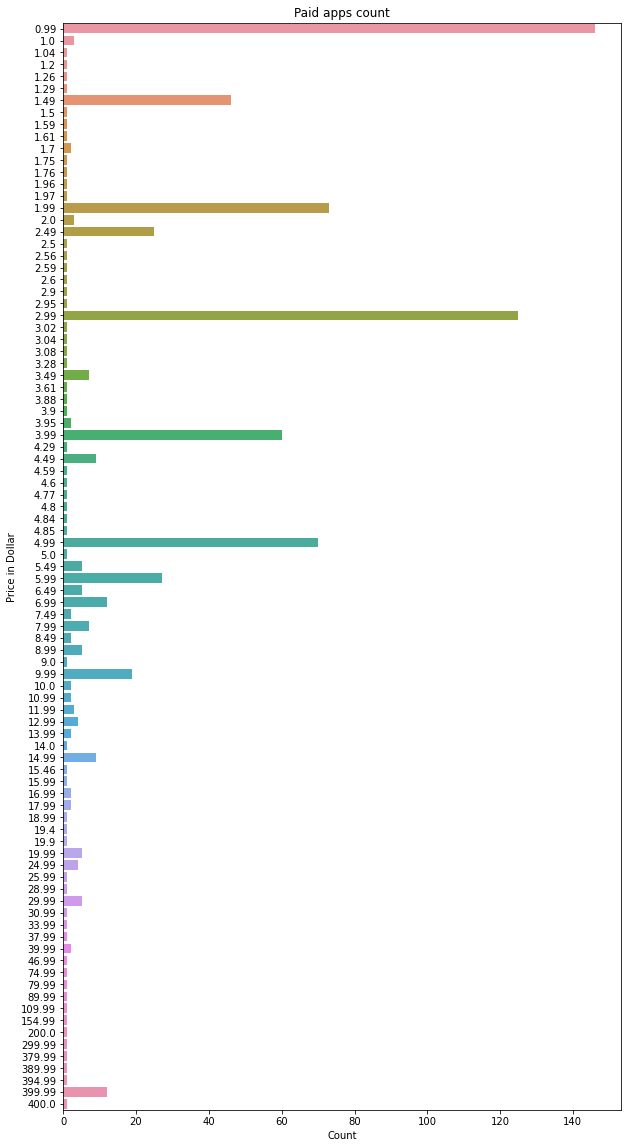

In [67]:
plt.figure(figsize = (10,20))
sns.barplot(data = paid_apps, x = paid_apps['Price'].value_counts(),
                              y = paid_apps['Price'].value_counts().keys(), orient = 'h')
plt.title("Paid apps count")
plt.xlabel("Count")
plt.ylabel("Price in Dollar")
plt.show()

### Observation
* The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
* There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.
* In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.
* Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
* This is given by:

### 6. Content Rating

In [68]:
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [69]:
ps['Content Rating'].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0, 0.5, 'Count')

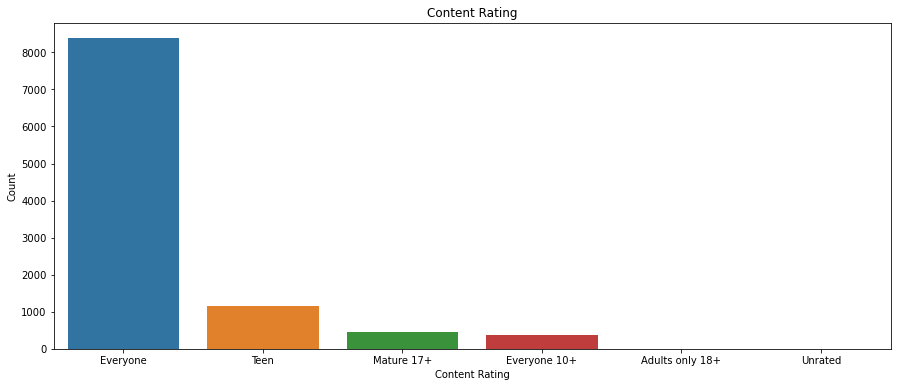

In [70]:
# Visualzing with the graph
plt.figure(figsize = (15,6))
sns.barplot(data = ps, x = ps['Content Rating'].value_counts().keys(), y = ps['Content Rating'].value_counts())
plt.title("Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Count")

### Observation
* It looks like most of the apps are made for everyone and the real source of income for them is Ads.

### 7. Genres

In [71]:
ps['Genres'].value_counts().iloc[:15]

Tools               842
Entertainment       588
Education           527
Business            427
Medical             408
Productivity        407
Personalization     388
Lifestyle           372
Communication       366
Sports              364
Finance             360
Action              356
Photography         322
Health & Fitness    306
Social              280
Name: Genres, dtype: int64

Text(0.5, 1.0, 'Genres')

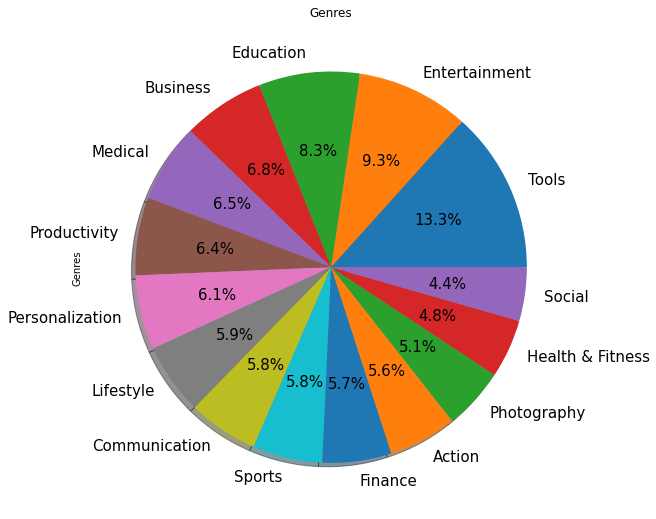

In [72]:
# Visualizing using pie chart.
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize = (9,9)) # fixing pie chart size
ps['Genres'].value_counts().iloc[:15].plot(kind = 'pie', shadow = True, autopct='%1.1f%%', textprops =textprops)
plt.title("Genres")

### Observation
* Looks like the most liked Genre is Tools but other than that every other app has equal weightage of likings

## Bivariate Analysis

### 1. Find the top profitable app in terms of revenue

In [73]:
paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.7,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up
5358,I am Rich!,FINANCE,3.8,93.0,22.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.7,1000,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up


In [74]:
# Creating a column called revenue
paid_apps['Revenue'] = paid_apps['Price'] * paid_apps['Installs']
paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,4000000.0
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.7,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up,1999950.0
5358,I am Rich!,FINANCE,3.8,93.0,22.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,399990.0
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,3999900.0
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.7,1000,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,399990.0


In [75]:
# Sorting the Revenie column in decending order
top_paid_apps = paid_apps.sort_values(["Revenue"],
               axis = 0, ascending = False)
top_paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564.0,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0
4347,Minecraft,FAMILY,4.5,2375336.0,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,19999500.0
4034,Hitman Sniper,GAME,4.6,408292.0,29.0,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up,9900000.0


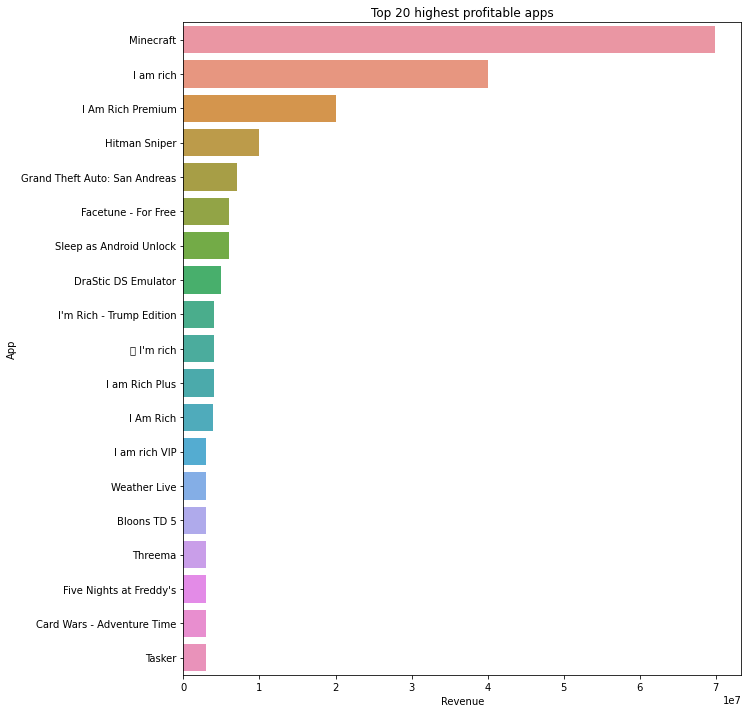

In [76]:
plt.figure(figsize = (10,12))
sns.barplot(data = top_paid_apps, y =top_paid_apps['App'].iloc[:20],  x = top_paid_apps['Revenue'].iloc[:20])
plt.title("Top 20 highest profitable apps")
plt.show()

### Observation
* Minecraft is the most profitable paid application followed by I'm rich

### 2. What are the categories in which the top paid apps belong to?

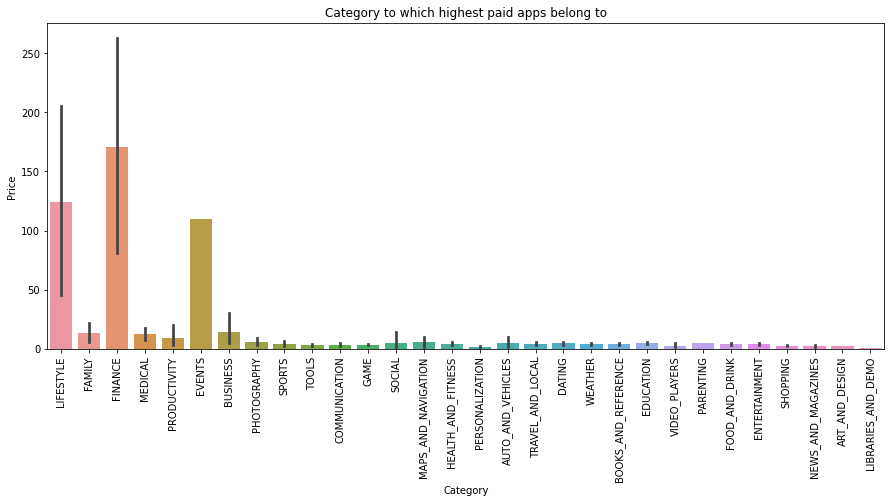

In [77]:
plt.figure(figsize = (15,6))
sns.barplot(data = paid_apps, x = paid_apps["Category"],
           y = paid_apps['Price'])
plt.xticks(rotation = 90)
plt.title("Category to which highest paid apps belong to")
plt.show()

### Observation
* The highest revenue generating category is Finance

##  Exploring User Review data

### Loading the dataset

In [78]:
ur = pd.read_csv("https://raw.githubusercontent.com/rahulinchal/EDA-on-Play-Store-App-Review/main/User%20Reviews.csv")
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [79]:
# Checking Shape
ur.shape

(64295, 5)

In [80]:
# Checking info
ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [81]:
# FInding mathematical calulation for numerical data
ur.describe().style.background_gradient()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [82]:
# Finding the duplicated value
dup = ur.duplicated().value_counts()
dup

True     33616
False    30679
dtype: int64

(array([0, 1]), [Text(0, 0, 'True'), Text(1, 0, 'False')])

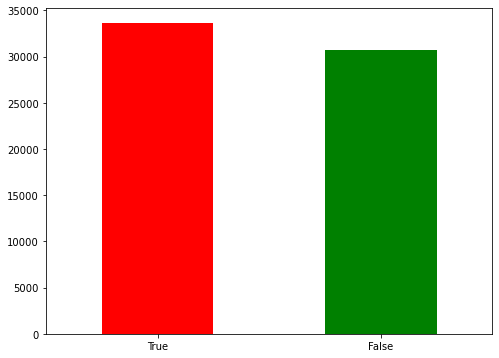

In [83]:
# Visualizing the duplicated value
plt.figure(figsize = (8,6))
dup.plot(kind = 'bar', color = ['r','g'])
plt.xticks(rotation = 360)

In [84]:
# Droping the duplicated value
ur = ur.drop_duplicates()
ur.duplicated().value_counts()

False    30679
dtype: int64

In [85]:
# Checking the shape after dropping the duplicated value
ur.shape

(30679, 5)

In [86]:
# Checking for null value
ur.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

Text(0.5, 1.0, 'Places of missing values in column')

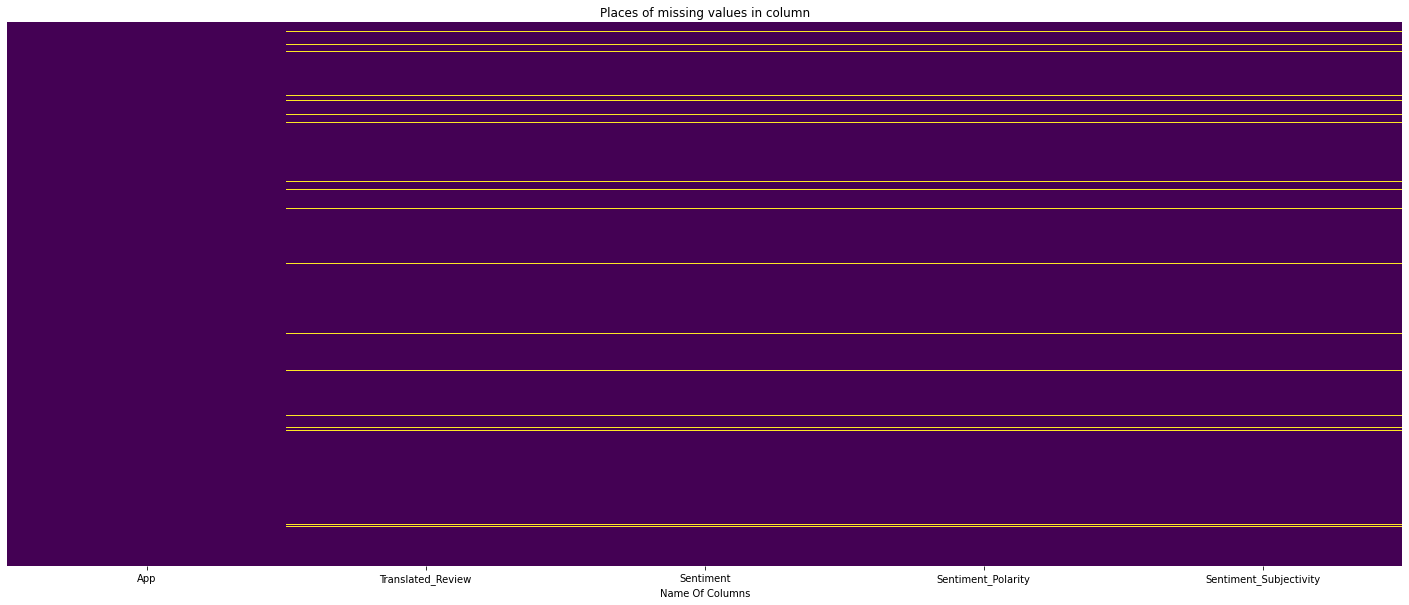

In [87]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(ur.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

### There are a lot of NaN values and we cannot just drop it.

In [89]:
ur[ur['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
268,11st,NaN,Neutral,0.0,0.0
362,1LINE – One Line with One Touch,NaN,NaN,NaN,NaN
405,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,NaN,NaN,NaN,NaN
539,"2Date Dating App, Love and matching",NaN,NaN,NaN,NaN
...,...,...,...,...,...
64082,Hotspot Shield Free VPN Proxy & Wi-Fi Security,NaN,NaN,NaN,NaN
64119,Hotstar,NaN,NaN,NaN,NaN
64156,Hotwire Hotel & Car Rental App,NaN,NaN,NaN,NaN
64202,Housing-Real Estate & Property,NaN,NaN,NaN,NaN


We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity in the majority of the cases.

In [90]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.

ur[ur['Translated_Review'].isnull() & ur['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity  of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogather.

In [91]:
# Dropping all the null values
ur = ur.dropna()

In [92]:
# Now checking the shape
ur.shape

(29692, 5)

In [93]:
# Lets check for the null values
ur.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

### Now there are no null value we can start analyzing the data 

In [94]:
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


## Exploratory Data Analysis

### Univariate Analysis

### 1. What are the sentiment type for the apps?

In [96]:
ur['Sentiment'].value_counts()

Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64

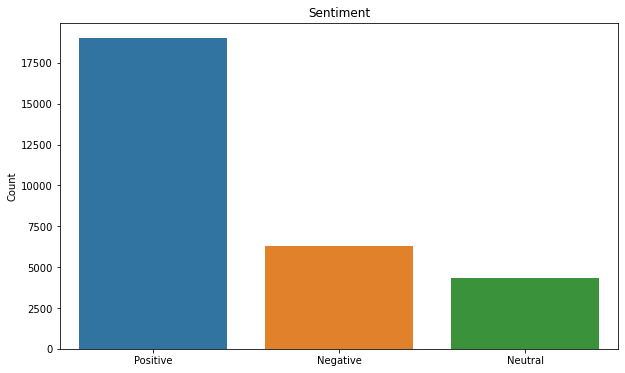

In [97]:
plt.figure(figsize = (10,6))
sns.barplot(data = ur, x = ur['Sentiment'].value_counts().keys(), y =ur['Sentiment'].value_counts())
plt.title("Sentiment")
plt.ylabel("Count")
plt.show()

### Observation
Looks like most of the app has positive response from the user

### 2. Top apps with Sentiment

In [98]:
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [99]:
app_sentiment = ur.groupby(['App'])['Sentiment'].value_counts().iloc[:27]
app_sentiment

App                                               Sentiment
10 Best Foods for You                             Positive     79
                                                  Neutral      11
                                                  Negative      5
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                  Positive     27
                                                  Neutral       8
                                                  Negative      1
11st                                              Positive     23
                                                  Neutral       9
                                                  Negative      7
1800 Contacts - Lens Store                        Positive     32
                                                  Neutral       5
                                                  Negative      3
1LINE – One Line with One Touch                   Positive     27
                                                  Negative      8
                

<AxesSubplot:ylabel='App,Sentiment'>

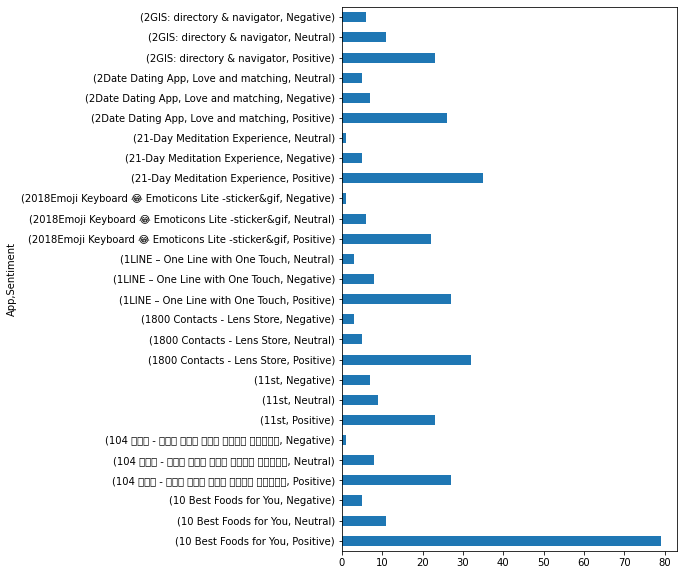

In [100]:
plt.figure(figsize = (6,10))
app_sentiment.plot(kind = 'barh')

### Observation
Looks like the app 10 Best fooods for you has highest positive review

### 3. Find the top 10 positive sentiment apps

In [101]:
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [102]:
positive_sentiment = ur[ur['Sentiment'] == 'Positive']
positive_sentiment.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [103]:
top_positive_sentiment = positive_sentiment.groupby('App')['Sentiment'].value_counts().nlargest(10)
top_positive_sentiment

App                             Sentiment
ColorNote Notepad Notes         Positive     91
Calorie Counter - Macros        Positive     87
Family Locator - GPS Tracker    Positive     85
8fit Workouts & Meal Planner    Positive     82
Calorie Counter - MyNetDiary    Positive     82
Bible                           Positive     80
10 Best Foods for You           Positive     79
Google Photos                   Positive     76
Calorie Counter & Diet Tracker  Positive     75
Episode - Choose Your Story     Positive     74
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Top 10 positive sentiment apps')

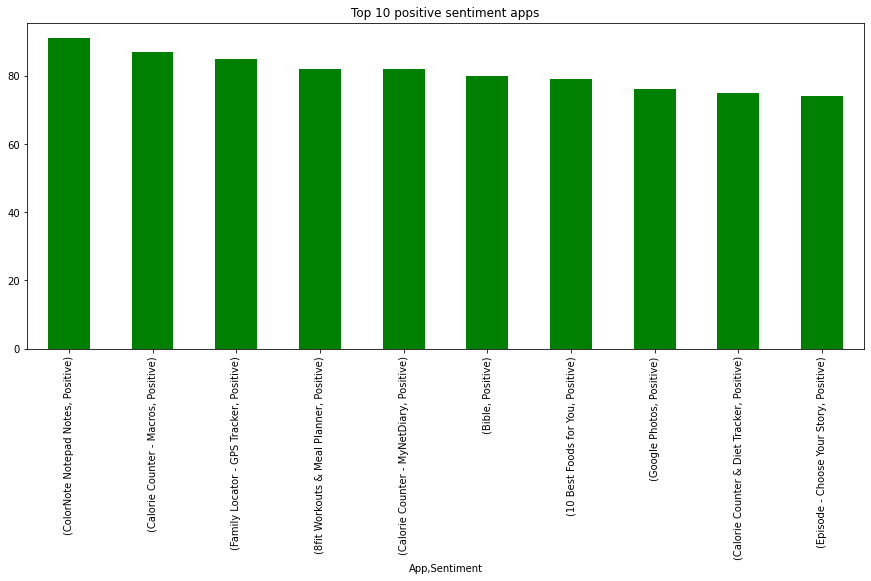

In [104]:
plt.figure(figsize = (15,6))
top_positive_sentiment.plot(kind = 'bar', color = 'g')
plt.title("Top 10 positive sentiment apps")

Text(0.5, 1.0, 'top_positive_sentiment')

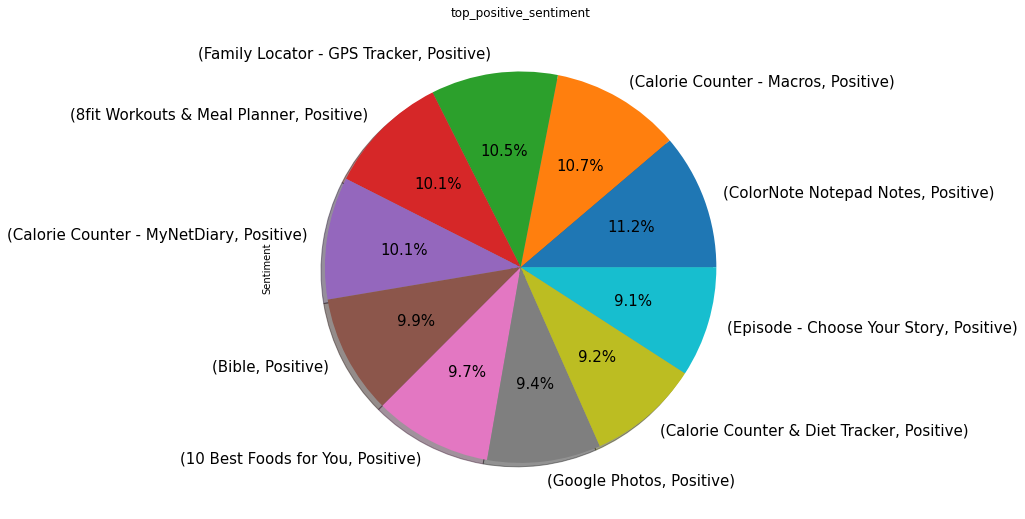

In [105]:
# Visualizing using pie chart.
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize = (9,9)) # fixing pie chart size
top_positive_sentiment.plot(kind = 'pie', shadow = True, autopct='%1.1f%%', textprops =textprops)
plt.title("top_positive_sentiment")

In [106]:
top_positive_sentiment.keys()

MultiIndex([(       'ColorNote Notepad Notes', 'Positive'),
            (      'Calorie Counter - Macros', 'Positive'),
            (  'Family Locator - GPS Tracker', 'Positive'),
            (  '8fit Workouts & Meal Planner', 'Positive'),
            (  'Calorie Counter - MyNetDiary', 'Positive'),
            (                         'Bible', 'Positive'),
            (         '10 Best Foods for You', 'Positive'),
            (                 'Google Photos', 'Positive'),
            ('Calorie Counter & Diet Tracker', 'Positive'),
            (   'Episode - Choose Your Story', 'Positive')],
           names=['App', 'Sentiment'])

# Trying tree map for this

In [107]:
import squarify

Text(0.5, 1.0, 'Top 10 positive sentiment apps')

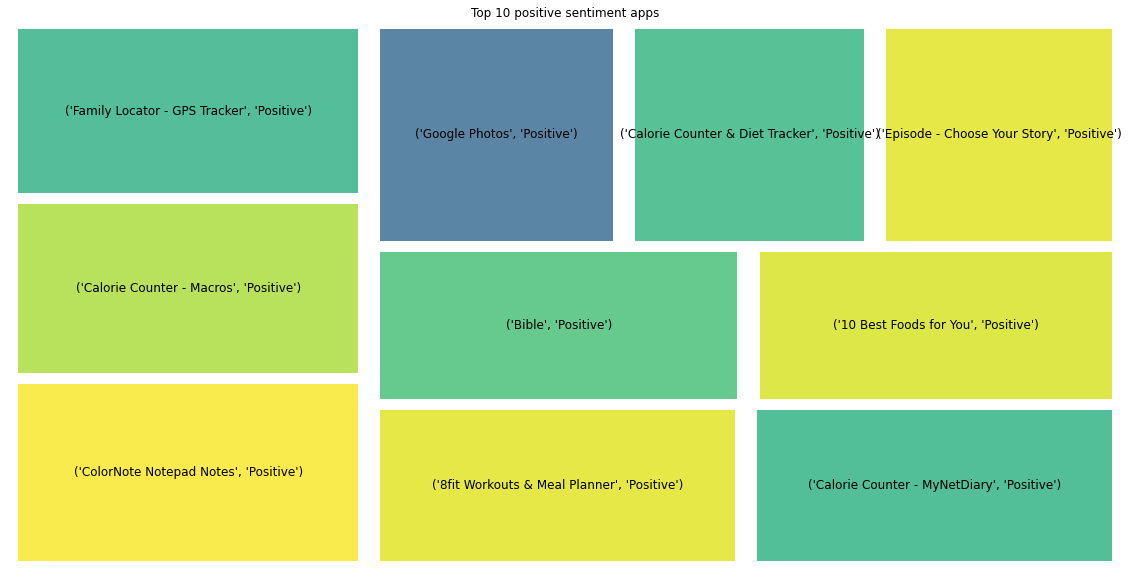

In [109]:
plt.figure(figsize = (20,10))
squarify.plot(sizes=top_positive_sentiment,alpha=0.8, label = top_positive_sentiment.keys(),
              pad=1, text_kwargs={'fontsize': 12})
plt.axis("off")
plt.title("Top 10 positive sentiment apps")

### 4. Find the top 10 Negetive sentiment apps

In [110]:
Negetive_sentiment = ur[ur['Sentiment'] == 'Negative']
Negetive_sentiment.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


In [111]:
top_negative_sentiment = Negetive_sentiment.groupby('App')['Sentiment'].value_counts().nlargest(10)
top_negative_sentiment

App                    Sentiment
Angry Birds Classic    Negative     59
Be A Legend: Soccer    Negative     59
Facebook               Negative     59
Cooking Fever          Negative     57
Candy Crush Soda Saga  Negative     50
Gardenscapes           Negative     50
8 Ball Pool            Negative     46
Agar.io                Negative     44
Basketball Stars       Negative     41
Block Puzzle           Negative     40
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Top 10 Negative sentiment apps')

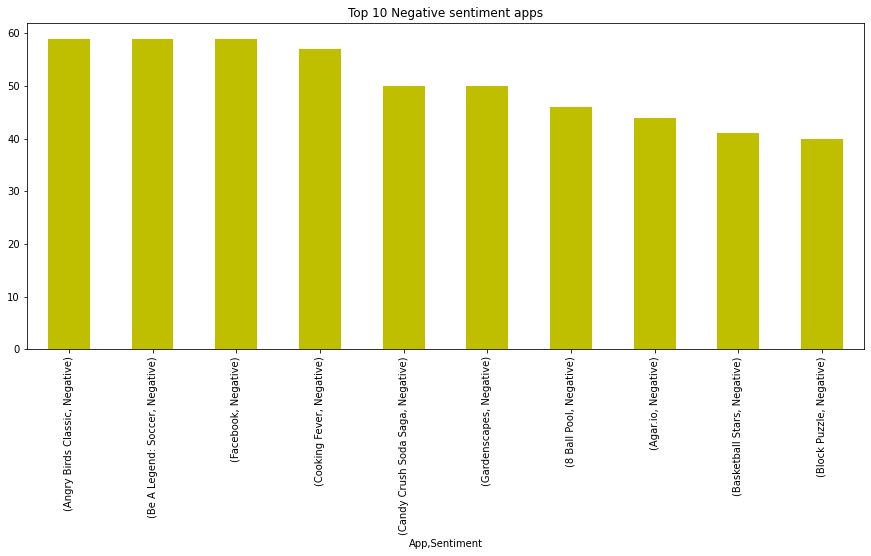

In [112]:
plt.figure(figsize = (15,6))
top_negative_sentiment.plot(kind = 'bar', color = 'y')
plt.title("Top 10 Negative sentiment apps")

Text(0.5, 1.0, 'top_negative_sentiment')

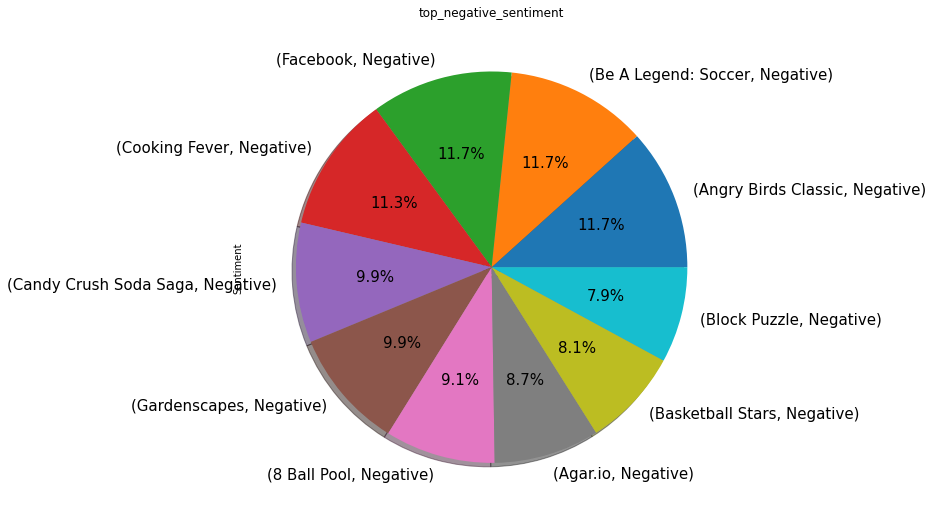

In [113]:
# Visualizing using pie chart.
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize = (9,9)) # fixing pie chart size
top_negative_sentiment.plot(kind = 'pie', shadow = True, autopct='%1.1f%%', textprops =textprops)
plt.title("top_negative_sentiment")

Text(0.5, 1.0, 'Top 10 positive sentiment apps')

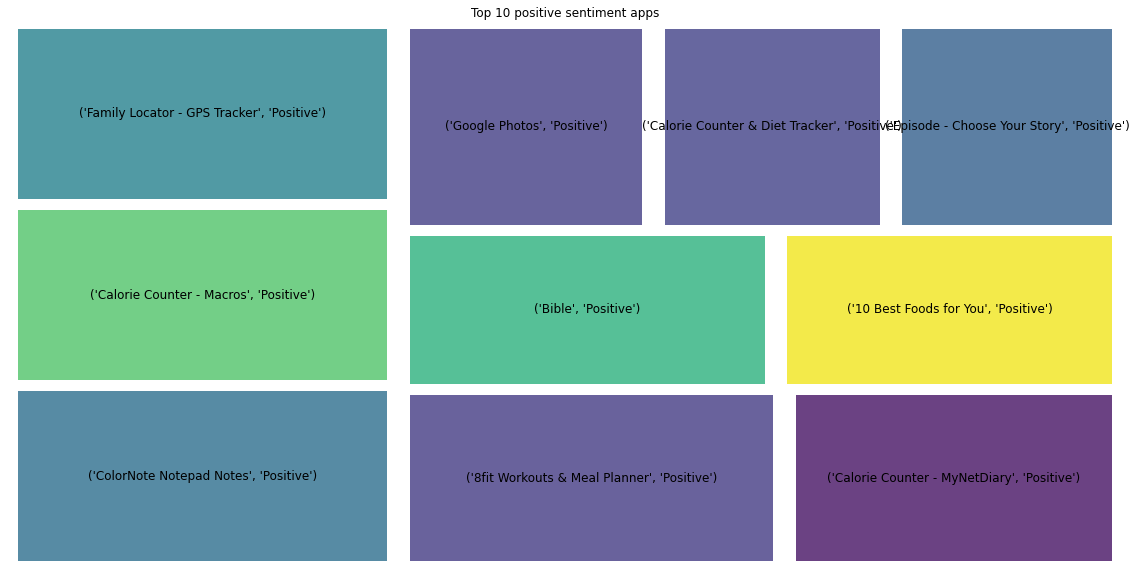

In [115]:
plt.figure(figsize = (20,10))
squarify.plot(sizes=top_negative_sentiment,alpha=0.8, label = top_positive_sentiment.keys(),
              pad=1, text_kwargs={'fontsize': 12})
plt.axis("off")
plt.title("Top 10 positive sentiment apps")

## Conclusion
* Percentage of free apps = ~92%
* Percentage of apps with no age restrictions = ~82%
* Most competitive category: Family
* Category with the highest number of installs: Game
* Category with the highest average app installs: Communicaction
* Percentage of apps that are top rated = ~80%
* There are 20 free apps that have been installed over a billion times
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* The median size of all apps in the play store is 12 MB.
* The apps whose size varies with device has the highest number average app installs.
* The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest.
* Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.

